In [8]:
import pandas as pd

intraDayDf = pd.read_csv("/Users/sagewong/git/DayTrader/IntradayStockData/AAPL_1min_firstratedata.csv")

intraDayDf["date"] = pd.to_datetime(intraDayDf["timestamp"]).dt.date

dayDf = intraDayDf.groupby("date").first()
dayDf

,timestamp,open,high,low,close,volume
date,,,,,,
2022-09-30,2022-09-30 04:00:00,143.59,143.59,143.10,143.49,4060
2022-10-03,2022-10-03 04:01:00,137.21,137.21,137.10,137.10,2585
2022-10-04,2022-10-04 04:00:00,144.02,145.27,144.02,144.71,4179
2022-10-05,2022-10-05 04:00:00,145.44,145.44,145.21,145.21,666
2022-10-06,2022-10-06 04:00:00,147.31,147.31,146.39,146.39,2160
...,...,...,...,...,...,...
2023-09-25,2023-09-25 04:00:00,175.58,175.58,175.29,175.50,1671
2023-09-26,2023-09-26 04:00:00,175.19,175.20,175.14,175.20,2682
2023-09-27,2023-09-27 04:00:00,172.71,173.32,172.50,173.23,3766


/var/folders/c6/2nhk07gx4s7b8xks2kwjq2vc0000gn/T/ipykernel_14399/1227428904.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  profitCount = pd.concat([profitCount, new_row])


final investment value after day trading: 1080.8828454728377
final investment value after holding: 1288.7941498252283


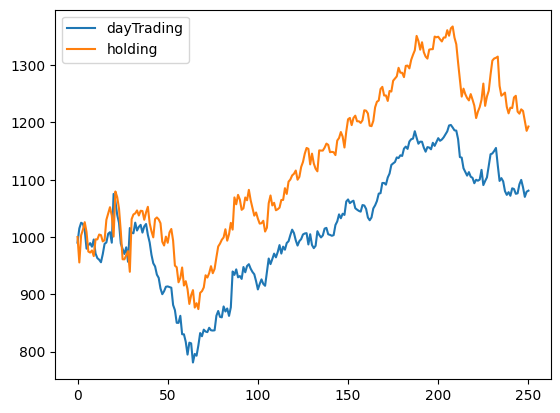

In [37]:
# tests for specific days
import matplotlib.pyplot as plt
import numpy as np

profitCount = pd.DataFrame(columns=["start_index", "end_index", "percent_change"])

investment = 1000
minuteToBuy = 0
minuteToSell = 400

firstValue = dayDf["open"].iloc[0].item()
shares = investment / firstValue

dates = np.array([])
investmentValue = np.array([])
openValues = np.array([])

def calculateHoldingGains(df, investment):
    startPrice = df.iloc[0]["open"].item()
    endPrice = df.iloc[df.shape[0]-1]["open"].item()
    percentChange = (endPrice-startPrice)/startPrice

    investment *= percentChange + 1
    return investment

for day in range(dayDf["timestamp"].shape[0]):
    dayStartIndex = intraDayDf[intraDayDf["timestamp"] == dayDf["timestamp"].iloc[day]].index
    try:
        dayEndIndex = intraDayDf[intraDayDf["timestamp"] == dayDf["timestamp"].iloc[day + 1]].index - 1
    except:
        dayEndIndex = dayDf["timestamp"].shape[0]
    
    openValue = intraDayDf.iloc[dayStartIndex]["open"].item()

    sellPrice = intraDayDf.iloc[dayStartIndex + minuteToSell]["open"].item()
    buyPrice = intraDayDf.iloc[dayStartIndex + minuteToBuy]["open"].item()
    percentChange = (sellPrice - buyPrice) / buyPrice
    investment *= percentChange + 1

    new_row = pd.DataFrame([{
    "start_index": dayStartIndex + minuteToBuy,
    "end_index": dayStartIndex + minuteToSell,
    "percent_change": percentChange
}])
    
    dates = np.append(dates, day)
    investmentValue = np.append(investmentValue, investment)
    openValues = np.append(openValues, openValue)

    profitCount = pd.concat([profitCount, new_row])
print("final investment value after day trading: " + str(investment))
print("final investment value after holding: " + str(calculateHoldingGains(intraDayDf, investment)))

plt.plot(dates, investmentValue, label="dayTrading")
plt.plot(dates, openValues * shares, label="holding")

plt.legend()
